Data Preprocessing

In [2]:
import pandas as pd
import csv

df = pd.read_csv("Boston_42_360082_-71_05888_6261b143b7e2570007ef7170.csv")
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1167609600,2007-01-01 00:00:00 +0000 UTC,-18000,Boston,42.360082,-71.05888,0.12,10000.0,-7.39,-1.62,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
1,1167613200,2007-01-01 01:00:00 +0000 UTC,-18000,Boston,42.360082,-71.05888,-0.22,10000.0,-5.16,-3.85,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2,1167616800,2007-01-01 02:00:00 +0000 UTC,-18000,Boston,42.360082,-71.05888,-1.01,10000.0,-6.47,-4.32,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
3,1167620400,2007-01-01 03:00:00 +0000 UTC,-18000,Boston,42.360082,-71.05888,-1.53,10000.0,-6.96,-5.86,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
4,1167624000,2007-01-01 04:00:00 +0000 UTC,-18000,Boston,42.360082,-71.05888,-1.06,10000.0,-6.51,-3.82,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n


In [3]:
df.columns
# grnd_level ? 

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [4]:
df.shape

(141778, 28)

In [5]:
#data exploration
check_wind_gust = pd.DataFrame(df.wind_gust).dropna()
check_wind_gust.head


<bound method NDFrame.head of         wind_gust
35           8.20
36           8.20
45           9.80
46          10.80
48          12.40
...           ...
141773      10.73
141774      10.73
141775       9.83
141776       6.26
141777       4.92

[50926 rows x 1 columns]>

In [6]:
#rain_1h rain_3h snow_1h snow_3h all have na values -> check shape of all available values
check_rain_3h = pd.DataFrame(df.rain_3h).dropna()
check_rain_3h.head


<bound method NDFrame.head of         rain_3h
16         4.10
26         2.00
37         3.00
146        0.50
188        0.80
...         ...
141730     1.00
141736    10.67
141737    10.67
141750     0.19
141752     0.19

[2754 rows x 1 columns]>

In [7]:
#Test: there are rows with no nas
pass

#returned merge errors:
#merged_df = check_rain_1h.merge(check_wind_gust, how="inner")
#merged_df = check_rain_3h.merge(check_wind_gust, how="right")
# data is sparsed, create ways to seperate certain df out

In [8]:
#Processing target values
weather_descriptions = df.weather_description
weather_descriptions = weather_descriptions.drop_duplicates() 
weather_descriptions.shape #31


(31,)

In [9]:
from re import search

for index, value in enumerate(df.weather_description):
    if search("clouds" , value):
        df.at[index, 'weather_description'] = 1 #is a health block
    elif search("rain" , value):
        df.at[index, 'weather_description'] = 2 #is a rain block
    elif search("mist" , value):
        df.at[index, 'weather_description'] = 2 #is a rain block
    elif search("fog" , value):
        df.at[index, 'weather_description'] = 3 #is a wind block
    elif search("thunderstorm" , value):
        df.at[index, 'weather_description'] = 2 #is a rain block
    elif search("smoke" , value):
        df.at[index, 'weather_description'] = 3 #is a wind block
    elif search("drizzle" , value):
        df.at[index, 'weather_description'] = 2 #is a rain block
    elif search("haze" , value):
        df.at[index, 'weather_description'] = 3 #is a wind block
    elif search("sky" , value):
        df.at[index, 'weather_description'] = 1 #is a health block
    elif search("snow" , value):
        df.at[index, 'weather_description'] = 4 #is a ice block

df.weather_description.head()

0    1
1    1
2    1
3    1
4    1
Name: weather_description, dtype: object

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [11]:
df.describe()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,1.417780e+05,141778.000000,1.417780e+05,1.417780e+05,141778.000000,138129.00000,141777.000000,141778.000000,141778.000000,141778.000000,...,141778.000000,141778.000000,141778.000000,50926.000000,23209.000000,2754.000000,3551.000000,369.000000,141778.000000,141778.000000
mean,1.409349e+09,-15697.775395,4.236008e+01,-7.105888e+01,10.767315,9091.56432,4.595099,9.225224,9.643905,11.916229,...,67.247253,3.645130,171.246223,6.294617,1.092700,3.100973,0.640924,1.726369,55.660815,741.320106
std,1.396588e+08,1728.522930,1.133817e-10,3.686309e-11,28.346997,2375.98801,10.363111,28.981280,28.304326,10.091242,...,19.949145,2.805566,122.478248,4.964854,1.733973,4.608776,0.698133,1.908143,33.461578,116.582416
min,1.167610e+09,-18000.000000,4.236008e+01,-7.105888e+01,-9998.780000,100.00000,-31.430000,-10005.780000,-9998.990000,-273.180000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.130000,0.100000,0.250000,0.000000,200.000000
25%,1.288531e+09,-18000.000000,4.236008e+01,-7.105888e+01,3.010000,10000.00000,-2.850000,0.370000,2.110000,3.900000,...,52.000000,1.500000,40.000000,2.060000,0.260000,0.500000,0.250000,0.500000,20.000000,741.000000
50%,1.409499e+09,-14400.000000,4.236008e+01,-7.105888e+01,10.810000,10000.00000,5.070000,9.810000,9.730000,11.945000,...,68.000000,3.600000,200.000000,5.650000,0.500000,1.000000,0.380000,1.000000,75.000000,801.000000
75%,1.530327e+09,-14400.000000,4.236008e+01,-7.105888e+01,18.817500,10000.00000,13.180000,18.660000,17.750000,20.000000,...,85.000000,5.300000,281.000000,10.300000,1.230000,4.000000,0.790000,2.000000,90.000000,803.000000
max,1.650496e+09,-14400.000000,4.236008e+01,-7.105888e+01,37.770000,10000.00000,27.190000,41.750000,35.560000,39.580000,...,100.000000,20.100000,360.000000,26.800000,46.230000,41.900000,9.900000,14.000000,100.000000,804.000000


Date column clean up before making neural prophet

In [11]:
df["dt_iso"] = [date[0:10] for date in df["dt_iso"]]
df = df.drop_duplicates('dt_iso', keep="first")
df
            

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1167609600,2007-01-01,-18000,Boston,42.360082,-71.05888,0.12,10000.0,-7.39,-1.62,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,1,03n
31,1167696000,2007-01-02,-18000,Boston,42.360082,-71.05888,7.81,3200.0,7.06,4.81,...,NaN,1.04,NaN,NaN,NaN,90,300,Drizzle,2,09n
58,1167782400,2007-01-03,-18000,Boston,42.360082,-71.05888,2.79,10000.0,-9.31,0.19,...,NaN,NaN,NaN,NaN,NaN,1,800,Clear,1,01n
82,1167868800,2007-01-04,-18000,Boston,42.360082,-71.05888,7.13,10000.0,-2.05,3.19,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,1,03n
106,1167955200,2007-01-05,-18000,Boston,42.360082,-71.05888,8.73,10000.0,0.45,5.56,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,1,02n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141652,1650067200,2022-04-16,-14400,Boston,42.360082,-71.05888,16.28,10000.0,-2.42,14.67,...,7.60,NaN,NaN,NaN,NaN,20,801,Clouds,1,02n
141676,1650153600,2022-04-17,-14400,Boston,42.360082,-71.05888,11.79,NaN,7.51,10.98,...,11.62,1.46,NaN,NaN,NaN,0,501,Rain,2,10n
141701,1650240000,2022-04-18,-14400,Boston,42.360082,-71.05888,7.50,10000.0,-4.34,6.07,...,4.47,NaN,NaN,NaN,NaN,20,801,Clouds,1,02n
141725,1650326400,2022-04-19,-14400,Boston,42.360082,-71.05888,8.11,10000.0,2.15,7.68,...,5.36,NaN,NaN,NaN,NaN,90,804,Clouds,1,04n


In [12]:
df = df[df['temp'] >= -50]

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

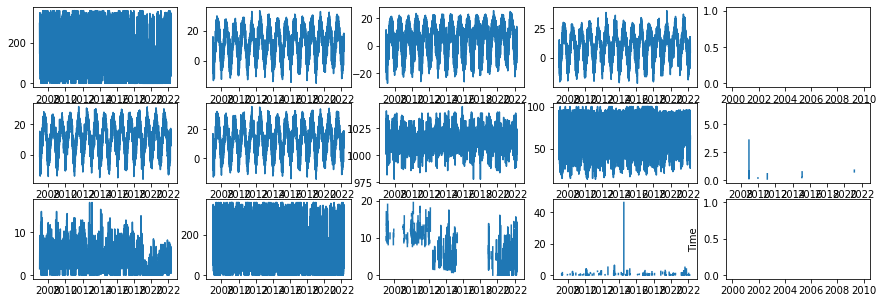

In [13]:
#Checking for variable variation in each independent variables.
df ['dt_iso'] = pd.to_datetime(df ['dt_iso'])
fig, (axis1,axis2,axis3) = plt.subplots(3,5,figsize=(15,5))
plt.ylabel("Values")
plt.ylabel("Time")
axis1[0].plot(df['dt_iso'], df['wind_deg'])
axis1[1].plot(df['dt_iso'], df['temp'])
axis1[2].plot(df['dt_iso'], df['dew_point'])
axis1[3].plot(df['dt_iso'], df['feels_like'])
axis1[4].plot(df['dt_iso'], df['rain_3h'])
axis2[0].plot(df['dt_iso'], df['temp_min'])
axis2[1].plot(df['dt_iso'], df['temp_max'])
axis2[2].plot(df['dt_iso'], df['pressure'])
axis2[3].plot(df['dt_iso'], df['humidity'])
axis2[4].plot(df['dt_iso'], df['snow_1h'])
axis3[0].plot(df['dt_iso'], df['wind_speed'])
axis3[1].plot(df['dt_iso'], df['wind_deg'])
axis3[2].plot(df['dt_iso'], df['wind_gust'])
axis3[3].plot(df['dt_iso'], df['rain_1h'])
axis3[4].plot(df['dt_iso'], df['snow_3h'])
plt.show()

In [14]:
df["temp"].min()


-15.22

In [16]:
from neuralprophet import NeuralProphet
forecasted_df = pd.DataFrame()

# independent_columns = ['snow_3h','rain_1h','wind_gust','wind_deg','wind_speed','snow_1h','humidity','pressure','temp_max','temp_min','rain_3h','feels_like','dew_point','temp']
independent_columns = ['wind_deg','wind_speed','humidity','pressure','temp_max','temp_min','feels_like','dew_point','temp']

# new_column = df[['dt_iso',"temp_max"]]
# new_column.columns = ['ds', 'y']
# n = NeuralProphet()
# model = n.fit(new_column)
# future = n.make_future_dataframe(new_column, periods=365)
# forecast = n.predict(future)
# forecast.tail()
finaldf = pd.DataFrame()


def forecast_columns(num_days_ahead, listofcolumns):
    for variable in listofcolumns:
        new_column = df[['dt_iso',variable]]
        print("-------------Currently using Neural Prophet to predict: " + str(variable) + " for the next " + str(num_days_ahead) + " days.---------------")
        new_column.columns = ['ds', 'y']
        new_column['y'] = new_column['y'].replace(np.nan,0)
        n = NeuralProphet()
        model = n.fit(new_column)
        future = n.make_future_dataframe(new_column, periods=num_days_ahead)
        forecast = n.predict(future)
        finaldf[variable] = list(forecast['yhat1'])


forecast_columns(5589,independent_columns)
# finaldf = pd.concat(forecast_columns(365,independent_columns))  

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


-------------Currently using Neural Prophet to predict: wind_deg for the next 5589 days.---------------


100%|██████████| 143/143 [00:00<00:00, 368.59it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.86E-02, min: 7.00E-01
100%|██████████| 143/143 [00:00<00:00, 420.46it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.86E-02, min: 1.45E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.00E-02
Epoch[119/119]: 100%|██████████| 119/119 [00:27<00:00,  4.36it/s, SmoothL1Loss=0.0455, MAE=84.7, RMSE=102, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) -

-------------Currently using Neural Prophet to predict: wind_speed for the next 5589 days.---------------


100%|██████████| 143/143 [00:00<00:00, 422.33it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.63E-01, min: 3.90E-01
100%|██████████| 143/143 [00:00<00:00, 411.98it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.88E-01, min: 3.37E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.45E-01
Epoch[119/119]: 100%|██████████| 119/119 [00:27<00:00,  4.34it/s, SmoothL1Loss=0.0366, MAE=1.7, RMSE=2.19, RegLoss=0] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) 

-------------Currently using Neural Prophet to predict: humidity for the next 5589 days.---------------


 99%|█████████▊| 141/143 [00:00<00:00, 422.01it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.05E-01, min: 7.84E-02
 99%|█████████▉| 142/143 [00:00<00:00, 440.80it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.00E-01, min: 6.78E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.49E-01
Epoch[119/119]: 100%|██████████| 119/119 [00:27<00:00,  4.36it/s, SmoothL1Loss=0.0288, MAE=16.2, RMSE=19.1, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) 

-------------Currently using Neural Prophet to predict: pressure for the next 5589 days.---------------


100%|██████████| 143/143 [00:00<00:00, 445.97it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.78E-02, min: 1.45E+00
100%|██████████| 143/143 [00:00<00:00, 449.46it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.05E-01, min: 2.25E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.93E-02
Epoch[119/119]: 100%|██████████| 119/119 [00:25<00:00,  4.61it/s, SmoothL1Loss=0.013, MAE=6.35, RMSE=8.14, RegLoss=0] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) 

-------------Currently using Neural Prophet to predict: temp_max for the next 5589 days.---------------


 99%|█████████▉| 142/143 [00:00<00:00, 447.02it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.07E-02, min: 1.08E+00
100%|██████████| 143/143 [00:00<00:00, 367.17it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.84E-02, min: 1.08E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.93E-02
Epoch[119/119]: 100%|██████████| 119/119 [00:25<00:00,  4.61it/s, SmoothL1Loss=0.00555, MAE=3.46, RMSE=4.38, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency)

-------------Currently using Neural Prophet to predict: temp_min for the next 5589 days.---------------


100%|██████████| 143/143 [00:00<00:00, 431.87it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.07E-02, min: 1.08E+00
100%|██████████| 143/143 [00:00<00:00, 456.63it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.07E-02, min: 1.94E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.37E-02
Epoch[119/119]: 100%|██████████| 119/119 [00:25<00:00,  4.61it/s, SmoothL1Loss=0.00526, MAE=3.26, RMSE=4.13, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency)

-------------Currently using Neural Prophet to predict: feels_like for the next 5589 days.---------------


100%|██████████| 143/143 [00:00<00:00, 449.47it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.86E-02, min: 9.37E-01
100%|██████████| 143/143 [00:00<00:00, 464.02it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.86E-02, min: 1.25E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.00E-02
Epoch[119/119]: 100%|██████████| 119/119 [00:27<00:00,  4.31it/s, SmoothL1Loss=0.00575, MAE=3.96, RMSE=5.07, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency)

-------------Currently using Neural Prophet to predict: dew_point for the next 5589 days.---------------


100%|██████████| 143/143 [00:00<00:00, 372.42it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.84E-02, min: 1.08E+00
100%|██████████| 143/143 [00:00<00:00, 450.15it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.84E-02, min: 1.08E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.50E-02
Epoch[119/119]: 100%|██████████| 119/119 [00:27<00:00,  4.31it/s, SmoothL1Loss=0.00784, MAE=4.66, RMSE=5.88, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency)

-------------Currently using Neural Prophet to predict: temp for the next 5589 days.---------------


 98%|█████████▊| 140/143 [00:00<00:00, 424.09it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.84E-02, min: 8.10E-01
 99%|█████████▊| 141/143 [00:00<00:00, 386.26it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.84E-02, min: 1.68E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.50E-02
Epoch[119/119]: 100%|██████████| 119/119 [00:30<00:00,  3.91it/s, SmoothL1Loss=0.00529, MAE=3.32, RMSE=4.2, RegLoss=0] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency)

In [17]:
finaldf.to_csv('./finaldf.csv')

In [18]:
independent_columns_with_target = ['wind_deg','wind_speed','humidity','pressure','temp_max','temp_min','feels_like','dew_point','temp','weather_description']
def split_training_columns(list_of_colums,dfold, dfnew):
    for variable in list_of_colums:
        dfnew[variable] = list(dfold[variable])
    return dfnew, print(dfnew)

training_df = pd.DataFrame()
split_training_columns(independent_columns_with_target,df, training_df)

      wind_deg  wind_speed  humidity  pressure  temp_max  temp_min  \
0          150        1.50        53      1025      2.80     -1.10   
1          300        5.10        95      1007      9.23      6.04   
2          290        2.60        37      1023      4.40      1.75   
3          230        7.20        51      1021      7.23      6.98   
4          230        6.20        56      1017      9.40      8.44   
...        ...         ...       ...       ...       ...       ...   
5584       272        3.13        27      1015     16.92     15.05   
5585        34        6.71        75      1010     16.16      8.34   
5586       349        2.24        41      1021      7.97      6.32   
5587       157        1.34        66      1024      9.20      7.19   
5588       289        3.13        62      1008      7.47      5.88   

      feels_like  dew_point   temp  weather_description  
0          -1.62      -7.39   0.12                    1  
1           4.81       7.06   7.81         

(      wind_deg  wind_speed  humidity  pressure  temp_max  temp_min  \
 0          150        1.50        53      1025      2.80     -1.10   
 1          300        5.10        95      1007      9.23      6.04   
 2          290        2.60        37      1023      4.40      1.75   
 3          230        7.20        51      1021      7.23      6.98   
 4          230        6.20        56      1017      9.40      8.44   
 ...        ...         ...       ...       ...       ...       ...   
 5584       272        3.13        27      1015     16.92     15.05   
 5585        34        6.71        75      1010     16.16      8.34   
 5586       349        2.24        41      1021      7.97      6.32   
 5587       157        1.34        66      1024      9.20      7.19   
 5588       289        3.13        62      1008      7.47      5.88   
 
       feels_like  dew_point   temp  weather_description  
 0          -1.62      -7.39   0.12                    1  
 1           4.81       7.06

In [19]:
for row in training_df['weather_description']:
    if row != type(int):
        print(row)
    else:
        print("row is int")

1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
4
1
1
1
4
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
4
1
1
4
1
1
2
1
2
1
2
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
2
1
2
2
1
1
1
1
1
1
2
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
2
2
1
1
1
1
3
1
1
1
1
1
1
3
3
2
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
1
2
2
1
1
1
2
1
1
1
1
1
3
1
1
1
1
1
1
1
3
3
1
1
1
1
1
2
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
2
1
1
1
1
3
1
1
1
1
1
4
1
1
4
1
4
1
1
1
2
1
4
1
1
2
1
1
2
4
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
2
1
1
1
2
1
4
1
4
4
1
1
2
1
1
1
2
1
1
1
1
4
1
1
1
2
1
1
1
1
1
1
2
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1


In [20]:
# select features and taget
features_train = training_df.drop(['weather_description'], axis = 1)
target_train = training_df['weather_description']
training_df.to_csv("./trainingdf.csv")
print(features_train.shape)
print(target_train.shape)

(5589, 9)
(5589,)


In [54]:
# initiate models without hyperparameter tuning
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(solver = 'liblinear')
svm_model = svm.SVC(class_weight="balanced", probability=True)

In [63]:
import sklearn
# function to predict classification and report accuracy given a model
predicted_neural = pd.read_csv("./finaldf.csv")
predicted_neural.drop(columns=predicted_neural.columns[0], 
        axis=1, 
        inplace=True)
print(predicted_neural.shape)

def predict(model):
    # fit model using training data
    model.fit(features_train, target_train.astype(int))
    
    # predict classification using training and testing data
    y_train_pred = model.predict(features_train)
    y_test_pred = model.predict(predicted_neural)
    
    # calculate accuracy
    train_accuracy = sklearn.metrics.f1_score(target_train, y_train_pred, average="macro")
    test_accuracy = sklearn.metrics.f1_score(y_train_pred, y_test_pred, average="macro")
    
    # report classification accuracies and errors
    print('The training classification accuracy is ' + str(round(train_accuracy, 5) * 100) + '%')
    print('The testing classification accuracy is ' + str(round(test_accuracy, 5) * 100) + '%')
    
    # save results
    savedataframe = predicted_neural
    savedataframe['predicted'] = list(y_train_pred)
    savedataframe.to_csv("./" + str(model) + "trainresults.csv")
    

(5589, 9)


In [27]:
# knn
predict(knn_model)

The training classification accuracy is 89.20700000000001%
The testing classification accuracy is 74.605%


In [29]:
# logistic regression
predict(logreg_model)

The training classification accuracy is 86.648%
The testing classification accuracy is 76.98%


In [64]:
# svm
predict(svm_model)

The training classification accuracy is 38.379000000000005%
The testing classification accuracy is 11.721%


In [58]:
knn_predicts = pd.read_csv("./KNeighborsClassifier()results.csv")
logreg_predicts = pd.read_csv("./LogisticRegression(solver='liblinear')results.csv")
svm_predicts = pd.read_csv("./SVC(class_weight='balanced', probability=True)trainresults.csv")

knn_predicts_train = pd.read_csv("./KNeighborsClassifier()trainresults.csv")
logreg_predicts_train = pd.read_csv("./LogisticRegression(solver='liblinear')trainresults.csv")
svm_predicts_train = pd.read_csv("./SVC(class_weight='balanced')trainresults.csv")


In [59]:
def cleanup_dataset(df):
    df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
    return df

cleanup_dataset(knn_predicts)
cleanup_dataset(logreg_predicts)
cleanup_dataset(svm_predicts)

cleanup_dataset(knn_predicts_train)
cleanup_dataset(logreg_predicts_train)
cleanup_dataset(svm_predicts_train)

,wind_deg,wind_speed,humidity,pressure,temp_max,temp_min,feels_like,dew_point,temp,predicted
0,182.619080,2.532769,64.788116,1013.226440,13.111124,10.495148,11.040152,4.731472,11.988246,1
1,174.903458,2.504685,64.806442,1013.430481,13.062893,10.428980,11.023756,4.705845,11.913224,4
2,179.938324,2.491750,64.708191,1013.462463,13.138615,10.585966,11.134825,4.833431,12.066737,1
3,174.464569,2.426026,64.287186,1013.970093,13.234665,10.549654,11.167509,4.777664,12.068681,1
4,177.266266,2.442235,63.857140,1014.333008,13.517971,10.787708,11.430067,4.802940,12.358321,1
...,...,...,...,...,...,...,...,...,...,...
5584,1274.635010,15.902388,84.752907,1013.457520,28.253424,30.190306,26.646978,25.356174,28.616680,1
5585,1273.203979,15.707704,86.904594,1013.004395,28.450388,30.371649,26.900236,26.032841,28.777805,2
5586,1285.408569,15.916275,85.304909,1012.655518,28.533037,30.471788,26.938665,25.721699,28.877396,1
5587,1277.928345,15.873331,85.204842,1012.813232,28.233160,30.184809,26.639925,25.463886,28.563747,1


In [60]:
# 1 is a health block
# 2 is a rain block
# 3 is a wind block
# 4 is a ice block
# 5 is a fire block


def show_num_each_block(df):
    num_health = 0
    num_rain = 0
    num_wind = 0
    num_ice = 0
    num_fire = 0
    for row in df.predicted:
        if row == 1:
            num_health += 1
        elif row == 2:
            num_rain += 1
        elif row == 3:
            num_wind += 1
        elif row == 4:
            num_ice += 1
        elif row == 5:
            num_fire += 1
    print("There are " + str(num_health) + " predicted health blocks in this dataset.")
    print("There are " + str(num_rain) + " predicted rain blocks in this dataset.")
    print("There are " + str(num_wind) + " predicted wind blocks in this dataset.")
    print("There are " + str(num_ice) + " predicted ice blocks in this dataset.")
    print("There are " + str(num_fire) + " predicted fire blocks in this dataset.")
    
show_num_each_block(knn_predicts)            

There are 4965 predicted health blocks in this dataset.
There are 623 predicted rain blocks in this dataset.
There are 0 predicted wind blocks in this dataset.
There are 1 predicted ice blocks in this dataset.
There are 0 predicted fire blocks in this dataset.


In [61]:
show_num_each_block(svm_predicts)    

There are 2609 predicted health blocks in this dataset.
There are 889 predicted rain blocks in this dataset.
There are 1401 predicted wind blocks in this dataset.
There are 690 predicted ice blocks in this dataset.
There are 0 predicted fire blocks in this dataset.


In [52]:
show_num_each_block(logreg_predicts)    

There are 5501 predicted health blocks in this dataset.
There are 88 predicted rain blocks in this dataset.
There are 0 predicted wind blocks in this dataset.
There are 0 predicted ice blocks in this dataset.
There are 0 predicted fire blocks in this dataset.


In [53]:
show_num_each_block(svm_predicts_train)    

There are 5589 predicted health blocks in this dataset.
There are 0 predicted rain blocks in this dataset.
There are 0 predicted wind blocks in this dataset.
There are 0 predicted ice blocks in this dataset.
There are 0 predicted fire blocks in this dataset.


In [38]:
show_num_each_block(knn_predicts_train)    

There are 4730 predicted health blocks in this dataset.
There are 767 predicted rain blocks in this dataset.
There are 1 predicted wind blocks in this dataset.
There are 91 predicted ice blocks in this dataset.
There are 0 predicted fire blocks in this dataset.


In [39]:
show_num_each_block(logreg_predicts_train)    

There are 4738 predicted health blocks in this dataset.
There are 787 predicted rain blocks in this dataset.
There are 1 predicted wind blocks in this dataset.
There are 63 predicted ice blocks in this dataset.
There are 0 predicted fire blocks in this dataset.


In [62]:
def show_num_each_block_train(df):
    num_health = 0
    num_rain = 0
    num_wind = 0
    num_ice = 0
    num_fire = 0
    for row in df.weather_description:
        if row == 1:
            num_health += 1
        elif row == 2:
            num_rain += 1
        elif row == 3:
            num_wind += 1
        elif row == 4:
            num_ice += 1
        elif row == 5:
            num_fire += 1
    print("There are " + str(num_health) + " health blocks in this dataset.")
    print("There are " + str(num_rain) + " rain blocks in this dataset.")
    print("There are " + str(num_wind) + " wind blocks in this dataset.")
    print("There are " + str(num_ice) + " ice blocks in this dataset.")
    print("There are " + str(num_fire) + " fire blocks in this dataset.")

show_num_each_block_train(training_df)

There are 4493 health blocks in this dataset.
There are 902 rain blocks in this dataset.
There are 53 wind blocks in this dataset.
There are 141 ice blocks in this dataset.
There are 0 fire blocks in this dataset.


In [79]:
#forced assignment:
# if humidity gets past a certain level -> rain block
# if temp gets past a certain level -> fire block
def hard_assignment(df):
    for index, row in enumerate(df.iterrows()):
        if row[1]['temp'] > 23:
            df.at[index, 'predicted'] = 5
    return df

df_to_use_in_game = hard_assignment(svm_predicts)
show_num_each_block(df_to_use_in_game)

df_to_use_in_game.predicted.to_csv("./df_to_use_in_game.csv")
        
            


There are 1774 predicted health blocks in this dataset.
There are 540 predicted rain blocks in this dataset.
There are 1339 predicted wind blocks in this dataset.
There are 551 predicted ice blocks in this dataset.
There are 1385 predicted fire blocks in this dataset.
